#import library yg dibutuhkan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

#Membaca dataset

In [3]:
df =  pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Persiapan data set

In [5]:
df.rename(index=str, columns={
    'Annual Income (k$)' : 'Income',
    'Spending Score (1-100)' : 'Score'
}, inplace=True)

In [6]:
X = df.drop(['CustomerID','Gender'], axis=1)

In [7]:
print(X)

     Age  Income  Score
0     19      15     39
1     21      15     81
2     20      16      6
3     23      16     77
4     31      17     40
..   ...     ...    ...
195   35     120     79
196   45     126     28
197   32     126     74
198   32     137     18
199   30     137     83

[200 rows x 3 columns]


menentukan jumlah cluster dengan elbow

Text(5, 150000, 'Possible elbow points')

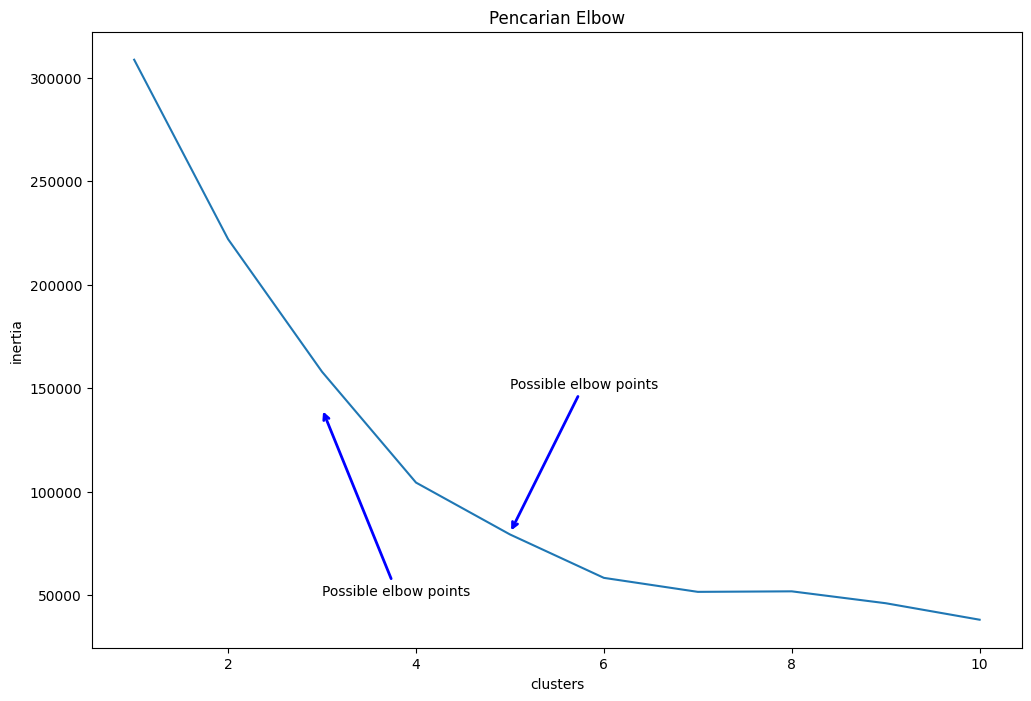

In [8]:
clusters=[]
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Pencarian Elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

#Panah elbow
ax.annotate('Possible elbow points', xy=(3, 140000), xytext=(3, 50000), xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible elbow points', xy=(5, 80000), xytext=(5, 150000), xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

Proses clustering

In [9]:
n_clust = 4
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

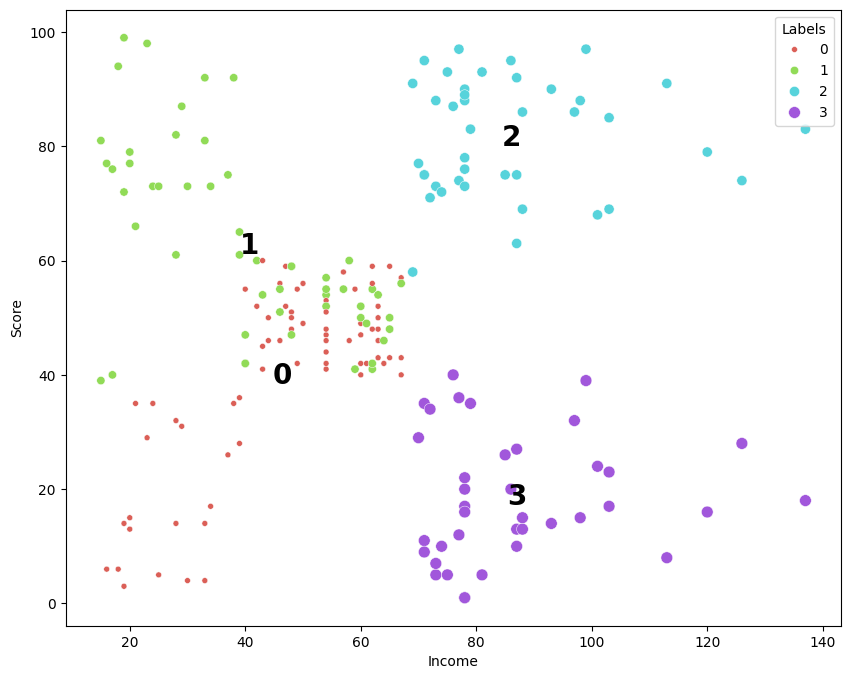

In [10]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Income', y='Score', hue='Labels', size='Labels', data=X, palette=sns.color_palette('hls', n_clust))

# Mengannotasi titik rata-rata dari setiap label
for label in X['Labels'].unique():
    plt.annotate(label,
                 (X[X['Labels'] == label]['Income'].mean(),
                  X[X['Labels'] == label]['Score'].mean()),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='black')

plt.show()

In [11]:
print(X)

     Age  Income  Score  Labels
0     19      15     39       1
1     21      15     81       1
2     20      16      6       0
3     23      16     77       1
4     31      17     40       1
..   ...     ...    ...     ...
195   35     120     79       2
196   45     126     28       3
197   32     126     74       2
198   32     137     18       3
199   30     137     83       2

[200 rows x 4 columns]


In [13]:
X.to_excel("outputr_cluster.xlsx")